<a href="https://colab.research.google.com/github/Vaishnavirajulu21/breast-cancer/blob/main/Binary_Breast_Cancer_Classification_Using_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install opencv-python
!pip install scikit-learn
!pip install tensorflow==2.15.0

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2
import glob
import random
from os import listdir
from sklearn.metrics import classification_report
import tensorflow as tf
import keras.utils as image

In [ ]:
breast_img = glob.glob('C:/Users/HP/Desktop/breast cancer classification CNN/breast-histopathology-images/**/*.png', recursive = True)

for imgname in breast_img[:3]:
    print(imgname)

C:/Users/HP/Desktop/breast cancer classification CNN/breast-histopathology-images\10253\0\10253_idx5_x1001_y1001_class0.png
C:/Users/HP/Desktop/breast cancer classification CNN/breast-histopathology-images\10253\0\10253_idx5_x1001_y1051_class0.png
C:/Users/HP/Desktop/breast cancer classification CNN/breast-histopathology-images\10253\0\10253_idx5_x1001_y1101_class0.png


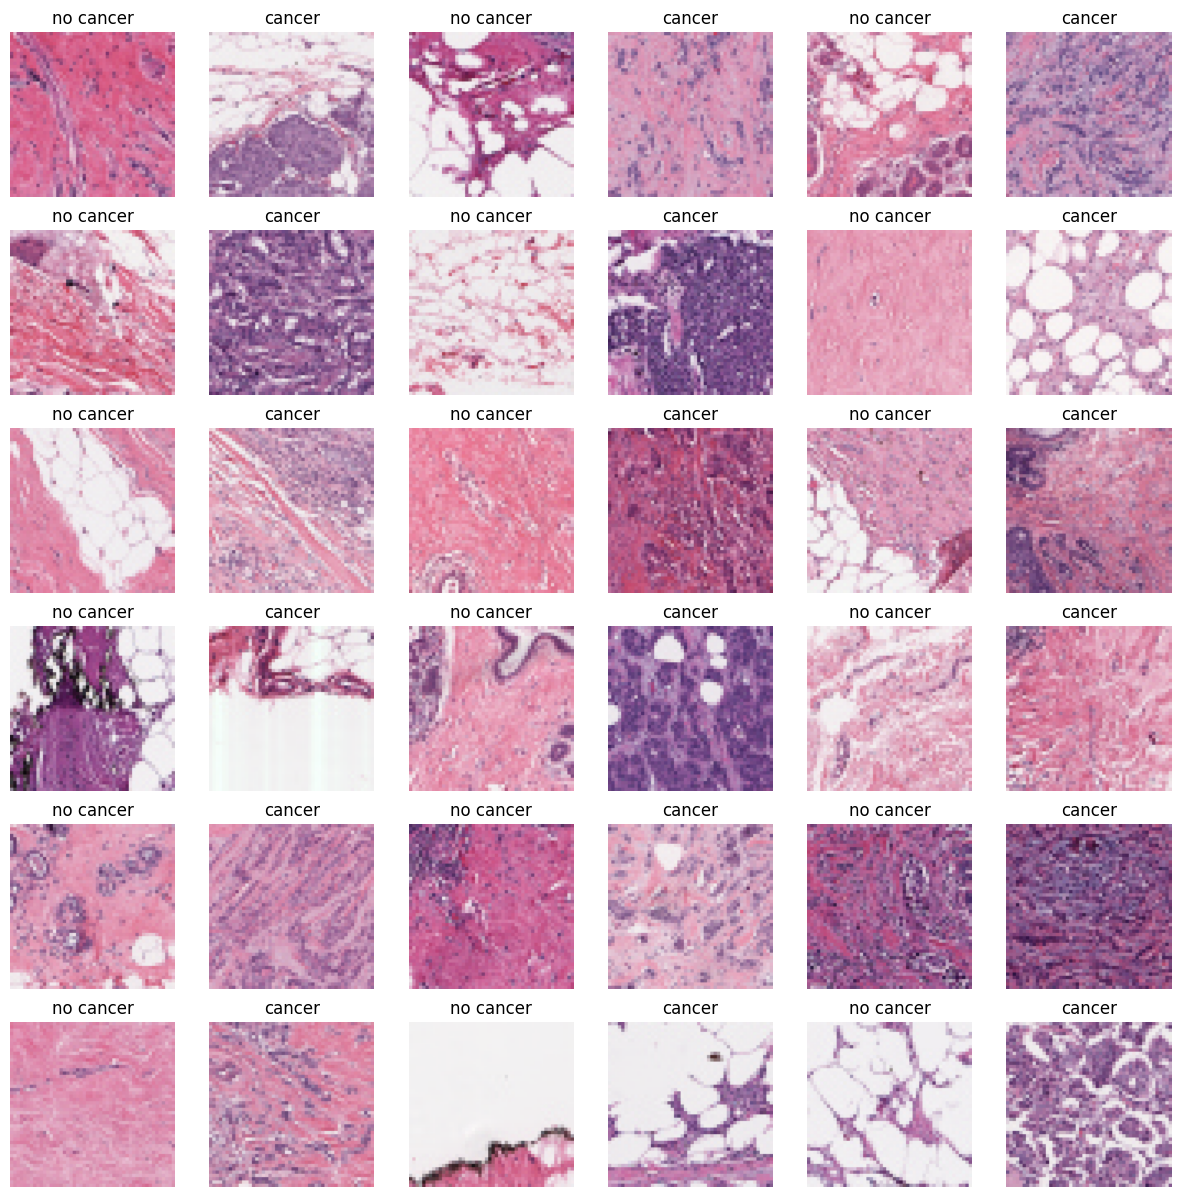

In [ ]:
N_IDC = []
P_IDC = []

for img in breast_img:
    if img[-5] == '0' :
        N_IDC.append(img)

    elif img[-5] == '1' :
        P_IDC.append(img)
plt.figure(figsize = (15, 15))

some_non = np.random.randint(0, len(N_IDC), 18)
some_can = np.random.randint(0, len(P_IDC), 18)

s = 0
for num in some_non:

        img = image.load_img((N_IDC[num]), target_size=(100, 100))
        img = image.img_to_array(img)

        plt.subplot(6, 6, 2*s+1)
        plt.axis('off')
        plt.title('no cancer')
        plt.imshow(img.astype('uint8'))
        s += 1
s = 1
for num in some_can:

        img = image.load_img((P_IDC[num]), target_size=(100, 100))
        img = image.img_to_array(img)

        plt.subplot(6, 6, 2*s)
        plt.axis('off')
        plt.title('cancer')
        plt.imshow(img.astype('uint8'))
        s += 1


In [ ]:
NewN_IDC=N_IDC[:78786]
print(len(NewN_IDC))
print(len(P_IDC))

78786
78784


In [ ]:
import cv2

non_img_arr = []
can_img_arr = []

for img_path in NewN_IDC:
    n_img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    if n_img is not None:
        n_img_size = cv2.resize(n_img, (50, 50), interpolation=cv2.INTER_LINEAR)
        non_img_arr.append([n_img_size, 0])

for img_path in P_IDC:
    c_img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    if c_img is not None:
        c_img_size = cv2.resize(c_img, (50, 50), interpolation=cv2.INTER_LINEAR)
        can_img_arr.append([c_img_size, 1])

In [ ]:
print(len(non_img_arr))
print(len(can_img_arr))
print(len(non_img_arr)+len(can_img_arr))

78786
78771
157557


In [ ]:
X = []
y = []

breast_img_arr = non_img_arr[:12389] + can_img_arr[:12389]
random.shuffle(breast_img_arr)

for feature, label in breast_img_arr:
    X.append(feature)
    y.append(label)

X = np.array(X)
y = np.array(y)


In [ ]:
def describeData(a,b):
    print('Total number of images: {}'.format(len(a)))
    print('Number of IDC(-) Images: {}'.format(np.sum(b==0)))
    print('Number of IDC(+) Images: {}'.format(np.sum(b==1)))
    print('Image shape (Width, Height, Channels): {}'.format(a[0].shape))
describeData(X,y)

Total number of images: 24778
Number of IDC(-) Images: 12389
Number of IDC(+) Images: 12389
Image shape (Width, Height, Channels): (50, 50, 3)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)

from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 2)
Y_test = to_categorical(Y_test, num_classes = 2)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (17344, 50, 50, 3)
Testing Data Shape: (7434, 50, 50, 3)


In [ ]:
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam, SGD
from keras.metrics import binary_crossentropy
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import itertools

# VGG16 MODEL

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from keras.models import Model

vgg_model=VGG16(input_shape=(50,50,3),include_top=False)
x=Flatten()(vgg_model.output)
prediction=Dense(2,activation='softmax')(x)
model=Model(inputs=vgg_model.input,outputs=prediction)
#X_test= X_train[:7434]
#Y_test=Y_train[:7434]
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 50, 50, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 50, 50, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 25, 25, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 25, 25, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 25, 25, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0   

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 40, batch_size = 500)

Epoch 1/40
35/35 [==============================] - 239s 7s/step - loss: 5.8448 - accuracy: 0.5203 - val_loss: 0.6963 - val_accuracy: 0.4938
Epoch 2/40
35/35 [==============================] - 252s 7s/step - loss: 0.6362 - accuracy: 0.6441 - val_loss: 0.5168 - val_accuracy: 0.7377
Epoch 3/40
35/35 [==============================] - 267s 8s/step - loss: 0.4457 - accuracy: 0.7980 - val_loss: 0.4078 - val_accuracy: 0.8181
Epoch 4/40
35/35 [==============================] - 235s 7s/step - loss: 0.4075 - accuracy: 0.8169 - val_loss: 0.3928 - val_accuracy: 0.8254
Epoch 5/40
35/35 [==============================] - 231s 7s/step - loss: 0.3831 - accuracy: 0.8297 - val_loss: 0.3686 - val_accuracy: 0.8382
Epoch 6/40
35/35 [==============================] - 255s 7s/step - loss: 0.3717 - accuracy: 0.8378 - val_loss: 0.3831 - val_accuracy: 0.8337
Epoch 7/40
35/35 [==============================] - 200s 6s/step - loss: 0.3570 - accuracy: 0.8449 - val_loss: 0.3506 - val_accuracy: 0.8503
Epoch 8/40
35

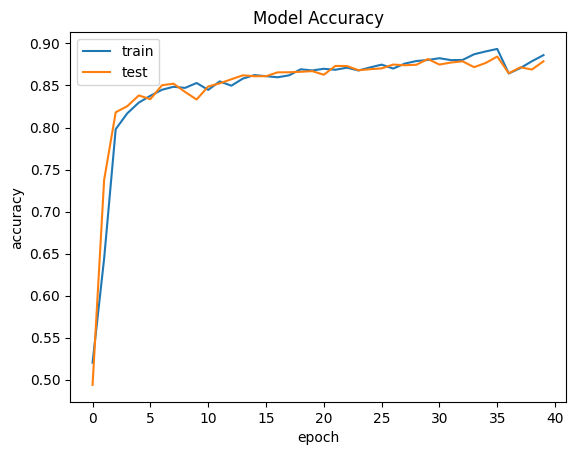

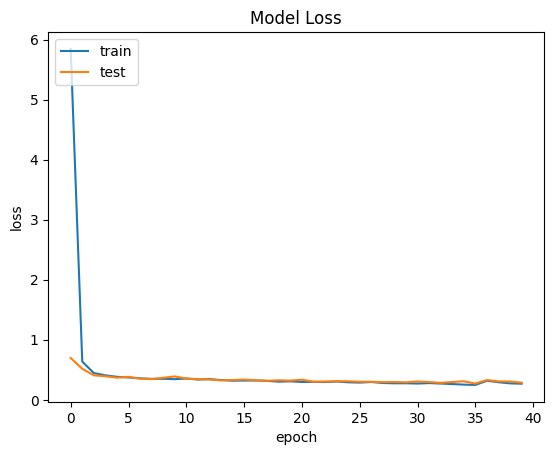

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

233/233 [==============================] - 32s 134ms/step


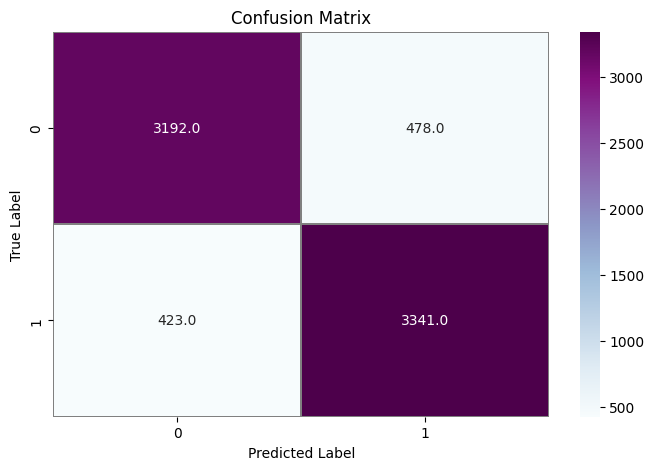

In [ ]:
from sklearn.metrics import accuracy_score
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(Y_test,axis = 1)
#accuracy=accuracy_score(y_true=Y_true, y_pred=Y_pred)
#print(accuracy)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
f,ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
model.evaluate(X_test,Y_test)

233/233 [==============================] - 31s 133ms/step - loss: 0.2847 - accuracy: 0.8788


[0.2847205400466919, 0.878800094127655]

Accuracy: 0.8788001076136669
Precision: 0.8788604138283685
Recall: 0.8788001076136669
F1 Score: 0.8787821279907122


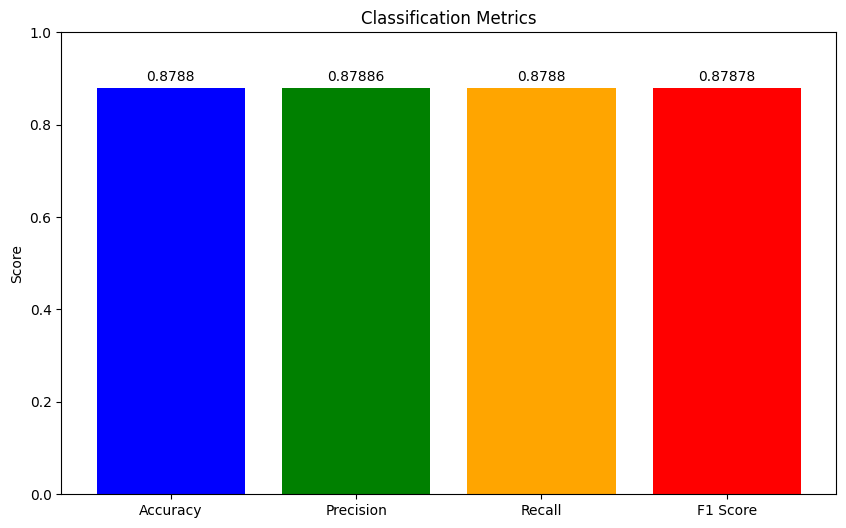

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming Y_true and Y_pred are already defined
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true_classes = np.argmax(Y_test, axis=1)


# Calculate the metrics
accuracy = accuracy_score(Y_true_classes, Y_pred_classes)
precision = precision_score(Y_true_classes, Y_pred_classes,average='weighted')
recall = recall_score(Y_true_classes, Y_pred_classes, average='weighted')
f1 = f1_score(Y_true_classes, Y_pred_classes, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
# Plotting the bar chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])

# Adding the value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 5), ha='center', va='bottom')

plt.ylim(0, 1)  # Set y-axis limit to [0, 1] for better visualization
plt.ylabel('Score')
plt.title('Classification Metrics')
plt.show()

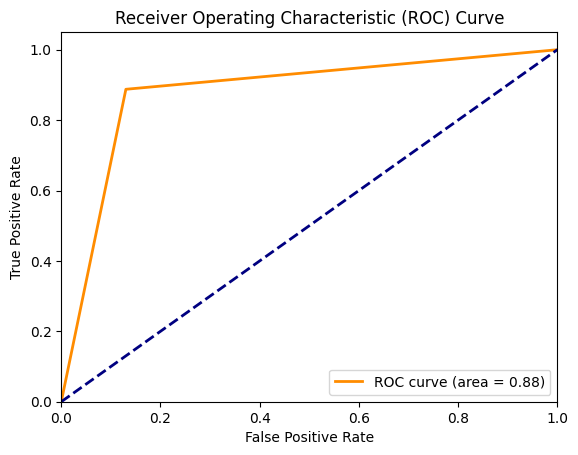

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming Y_true and Y_pred are already defined for a binary classification problem
fpr, tpr, _ = roc_curve(Y_true_classes, Y_pred_classes)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


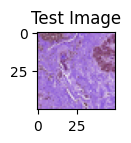

In [ ]:
def img_plot(arr,index=0):
    plt.figure(figsize = (1, 15))
    plt.title('Test Image')
    plt.imshow(arr[index])

index = 4000
img_plot(X_test, index)

In [ ]:
def img_plot(arr,index=0):
    plt.title('Test Image')
    plt.imshow(arr[index])
index = 4000
input = X_test[index:index+1]
pred = model.predict(input)[0].argmax()
label = Y_test[index].argmax()
print('Predicted Value using  cnn model',pred)
print("True Value",label)

1/1 [==============================] - 0s 72ms/step
Predicted Value using  cnn model 1
True Value 0


In [ ]:
model.save('C:/Users/HP/Desktop/breast cancer classification CNN/modelvgg16.h5')

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


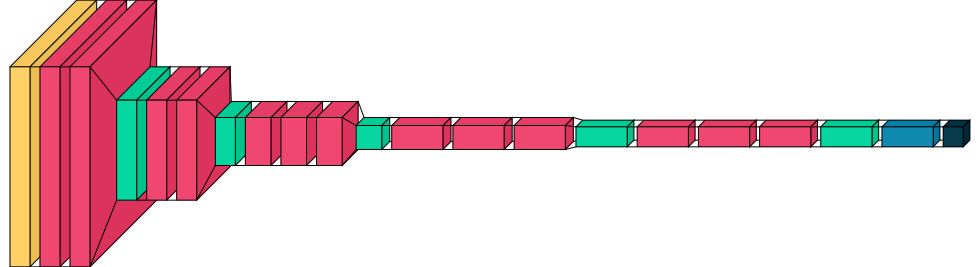

In [ ]:
import tensorflow as tf
from PIL import ImageFont
import visualkeras
model = tf.keras.models.load_model("C:/Users/HP/Desktop/breast cancer classification CNN/modelvgg16.h5")
font = ImageFont.truetype("arial.ttf", 32)  # using comic sans is strictly prohibited!
visualkeras.layered_view(model)

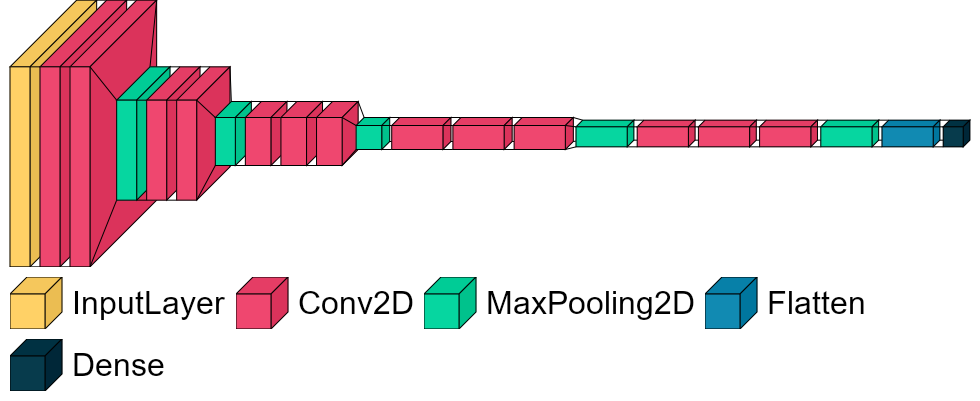

In [ ]:
import tensorflow as tf
from PIL import ImageFont
import visualkeras
model = tf.keras.models.load_model("C:/Users/HP/Desktop/breast cancer classification CNN/modelvgg16.h5")
font = ImageFont.truetype("arial.ttf", 32)  # using comic sans is strictly prohibited!
visualkeras.layered_view(model, legend=True, font=font)  # font is optional!

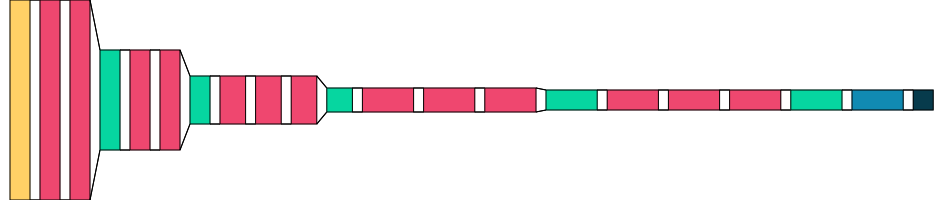

In [ ]:
visualkeras.layered_view(model, draw_volume=False)

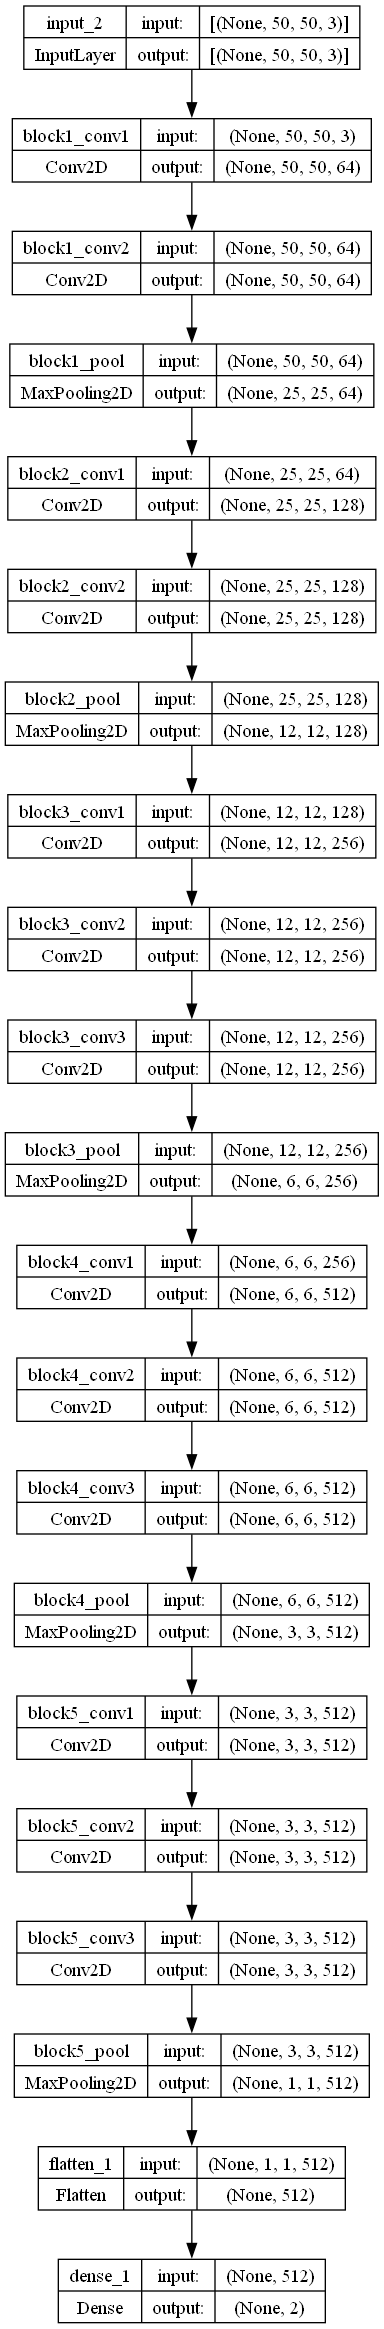

In [ ]:
!pip install pydot==1.4.2
!pip install graphviz==0.17
from keras.utils import plot_model
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/HP/Downloads/windows_10_cmake_Release_Graphviz-10.0.1-win64/Graphviz-10.0.1-win64/bin'  # Replace with your actual path
model = tf.keras.models.load_model("C:/Users/HP/Desktop/breast cancer classification CNN/modelvgg16.h5")
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)